In [26]:
## Solve ODE
# Initial Condintion
k = 0 # memory to recall
xTarget = xMemory[:,k]
x0 = np.random.vonmises(0,k_prior,N)
xNoise = np.random.vonmises(0,k_cue,N)
x_tilde = xTarget + xNoise

# Define firing events
events = [lambda t,x,j=j: sin((x[i] - 2*pi*t/T_theta)/2) for j in range(N)]
# events[i] = 0 if and only if x[i] == 2*pi*t/T mod 2pi

# Integration
tf = 2*pi
kwargs = {
    'N': N,
    'W': W,
    'k_prior': k_prior,
    'k_cue': k_cue,
    'sigma2_W': sigma2_W,
    'x_tilde': x_tilde
}
sol = solve_ivp(lambda t,y: mainode(t,y,**kwargs),(0,tf),x0,events=events)
t   = sol.t; tNow = sol.t[-1]
x_t = sol.y; xNow = sol.y[:,-1]
t_fire = sol.t_events
x_fire = [np.mod(ts/T_theta,1)*2*pi for ts in t_fire]
print(sol.message)


The solver successfully reached the end of the integration interval.


Text(0, 0.5, 'counts')

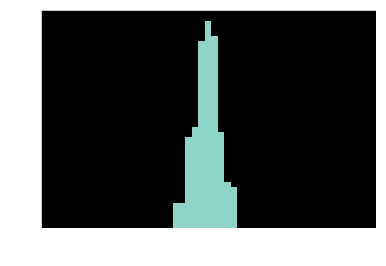

In [27]:
## evaluate errors
errors = xNow - xTarget
errors = np.mod(errors+pi,2*pi)-pi
h=plt.hist(errors)
plt.xlim((-pi,pi))
plt.xlabel('error')
plt.ylabel('counts')


The solver successfully reached the end of the integration interval.


Text(0, 0.5, 'counts')

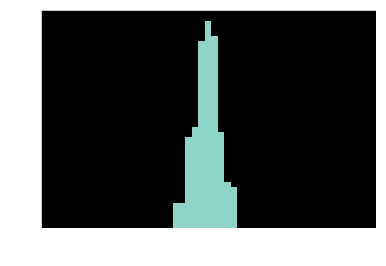

In [28]:
# Integration
tf += 20*pi
kwargs = {
    'N': N,
    'W': W,
    'k_prior': k_prior,
    'k_cue': k_cue,
    'sigma2_W': sigma2_W,
    'x_tilde': x_tilde
}
sol = solve_ivp(lambda t,y: mainode(t,y,**kwargs),(tNow,tf),xNow,events=events)
t   = sol.t; tNow = sol.t[-1]
x_t = sol.y; xNow = sol.y[:,-1]
t_fire = sol.t_events
x_fire = [np.mod(ts/T_theta,1)*2*pi for ts in t_fire]
print(sol.message)

## evaluate errors
errors = xNow - xTarget
errors = np.mod(errors+pi,2*pi)-pi
h=plt.hist(errors)
plt.xlim((-pi,pi))
plt.xlabel('error')
plt.ylabel('counts')
